# APP Reviews sentiment

Without specific details about the contents of the "app" DataFrame, it's challenging to provide a detailed analysis of its statements. However, if the DataFrame contains textual data such as reviews, comments, or statements, you can perform various types of text analysis to gain insights. Here are some common analyses you can perform on textual data:

### Columns

.Review

.Rating

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
app=pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\linkedin-reviews.csv')
app

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [3]:
# Display the first few rows of the dataset
app.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
#infromation about the datset
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
#summary statistics for numerical columns
app.describe()

,Rating
count,702.000000
mean,2.534188
std,1.481546
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [6]:
#check for null values
app.isnull().sum()

Review    0
Rating    0
dtype: int64

# EDA

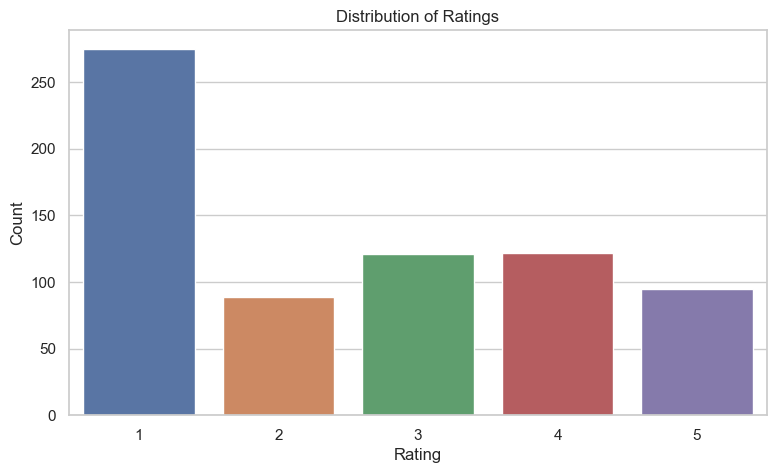

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=app
              , x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

This graph has ratings from 1 to 5 

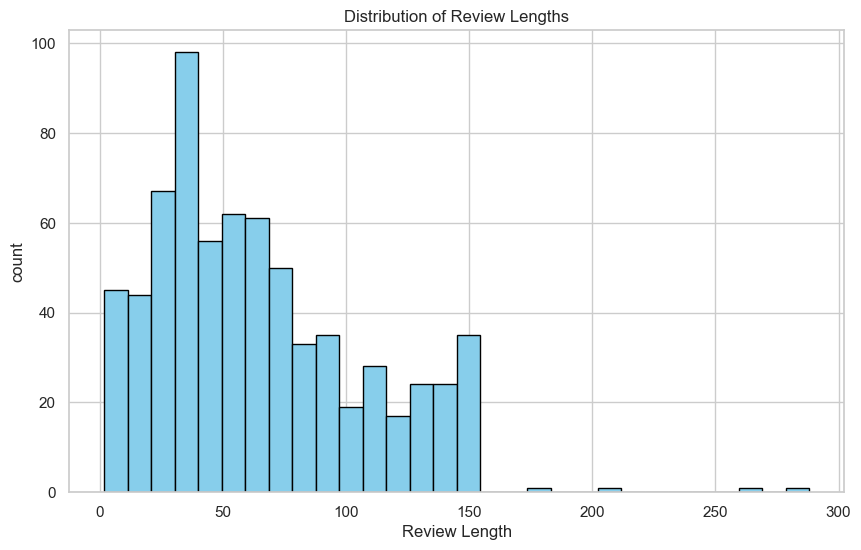

In [8]:
app['Review Length'] = app['Review'].apply(len)

# Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(app['Review Length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('count')
plt.grid(True)
plt.show()

# Adding Sentiment Labels in the Data


In [9]:
!pip install textblob




First few rows with sentiment labels:
                                              Review Sentiment
0  Does absolutely nothing for a LinkedIn beginne...  Negative
1                            Force close(galaxy tab)   Neutral
2  Slow and it tries to upload your contacts with...  Negative
3  Add ability to customize the profile and move ...   Neutral
4  Good app, but it's a pain that it's not possib...  Positive

Sentiment counts:
Positive    351
Neutral     209
Negative    142
Name: Sentiment, dtype: int64


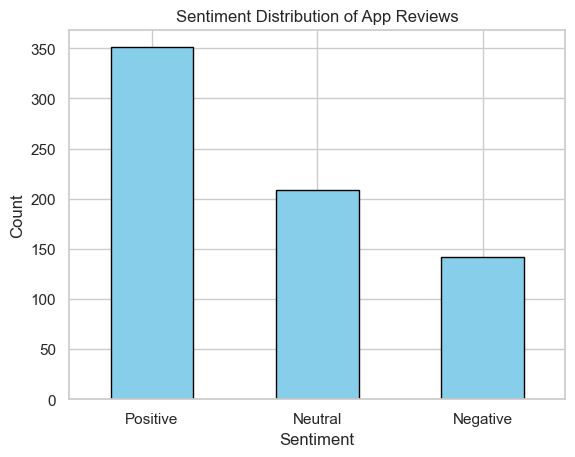

In [10]:
from textblob import TextBlob
def get_sentiment(Review):
    analysis = TextBlob(str(Review))
    # Check polarity to determine sentiment
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to each review
app['Sentiment'] = app['Review'].apply(get_sentiment)

# Display the first few rows with sentiment labels
print("First few rows with sentiment labels:")
print(app[['Review', 'Sentiment']].head())

# Count the number of reviews for each sentiment
sentiment_counts = app['Sentiment'].value_counts()
print("\nSentiment counts:")
print(sentiment_counts)

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Adding 3 sentiment labels from this data.

.Positive

.Netural Sentiment

.Negative

positive reviwes are high level,2nd netural sentiment,3rd negative

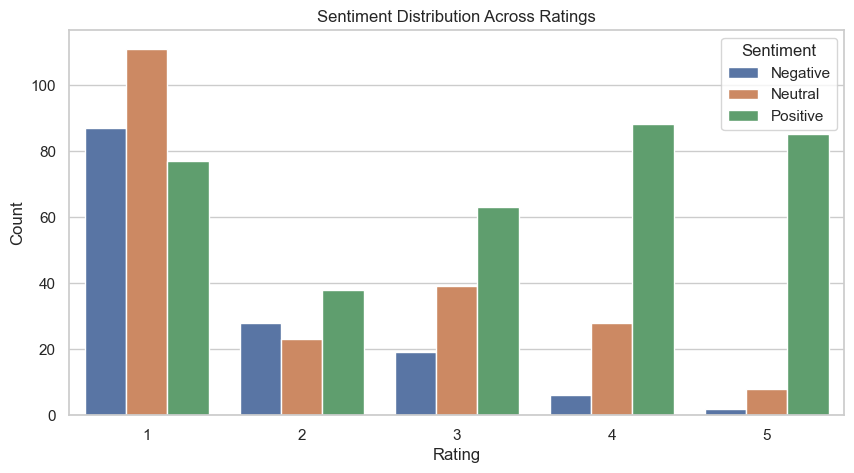

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=app, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()